/var/folders/g4/t1q9yqqx7h36p5_2jzq23jsw0000gn/T/ipykernel_67135/759008349.py:10: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  S_dB = librosa.power_to_db(Ostavi, ref=np.max)


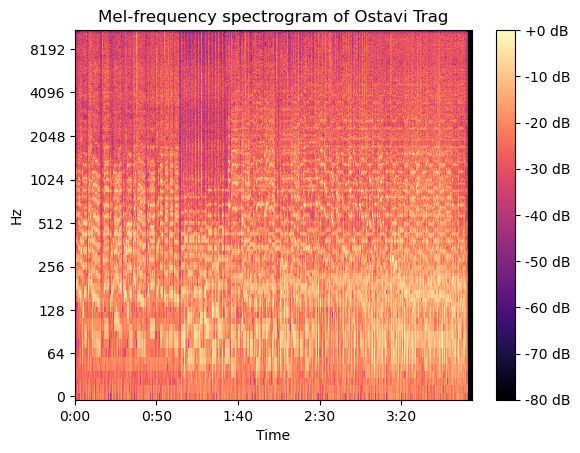

/var/folders/g4/t1q9yqqx7h36p5_2jzq23jsw0000gn/T/ipykernel_67135/759008349.py:22: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  S_dB = librosa.power_to_db(Duck, ref=np.max)


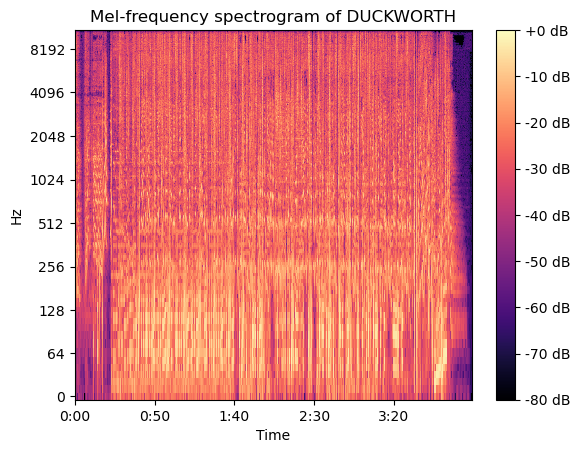

In [4]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

y1, sr1 = librosa.load("/Users/nicholaskim/Documents/Repositories/sample detector/songs/Ostavi trag_September.mp3")

Ostavi = librosa.stft(y1)

fig1, ax = plt.subplots()
S_dB = librosa.power_to_db(Ostavi, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='log', ax=ax)
fig1.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram of Ostavi Trag')
plt.show()

y2, sr2 = librosa.load("/Users/nicholaskim/Documents/Repositories/sample detector/songs/DUCKWORTH_Kendrick_Lamar.mp3")

Duck = librosa.stft(y2)

fig2, ax = plt.subplots()
S_dB = librosa.power_to_db(Duck, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='log', ax=ax)
fig2.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram of DUCKWORTH')
plt.show()

/var/folders/g4/t1q9yqqx7h36p5_2jzq23jsw0000gn/T/ipykernel_66483/3776676052.py:6: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  S_dB = librosa.power_to_db(Willie, ref=np.max)


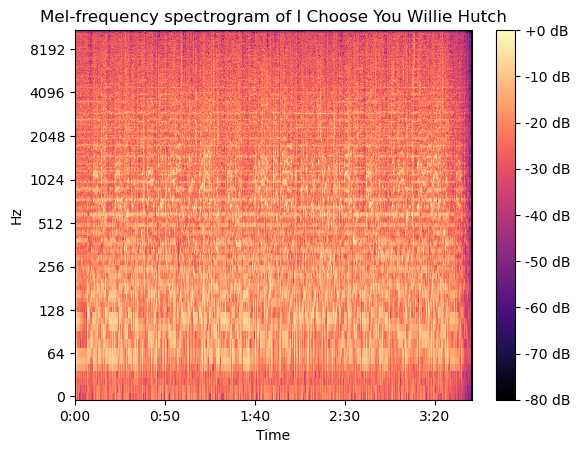

/var/folders/g4/t1q9yqqx7h36p5_2jzq23jsw0000gn/T/ipykernel_66483/3776676052.py:18: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  S_dB = librosa.power_to_db(UGK, ref=np.max)


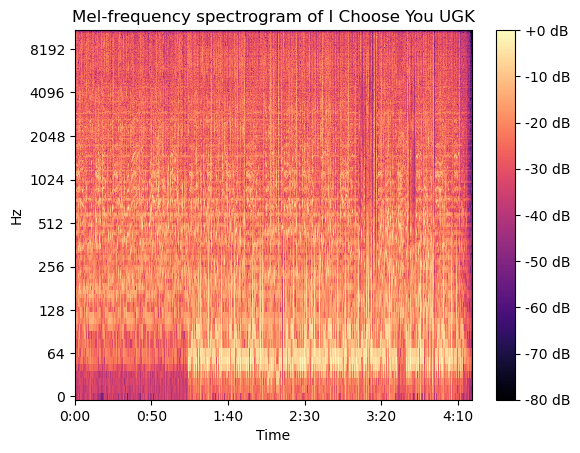

In [3]:
y3, sr3 = librosa.load("/Users/nicholaskim/Documents/Repositories/sample detector/songs/I_Choose_You_ Willie_Hutch.mp3")

Willie = librosa.stft(y3)

fig1, ax = plt.subplots()
S_dB = librosa.power_to_db(Willie, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='log', ax=ax)
fig1.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram of I Choose You Willie Hutch')
plt.show()

y4, sr4 = librosa.load("/Users/nicholaskim/Documents/Repositories/sample detector/songs/Int_l_Players_Anthem _UGK.mp3")

UGK = librosa.stft(y4)

fig1, ax = plt.subplots()
S_dB = librosa.power_to_db(UGK, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='log', ax=ax)
fig1.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram of I Choose You UGK')
plt.show()

In [5]:
from collections import defaultdict

S = np.abs(librosa.stft(y1, n_fft=2048, hop_length=512))
frequencies = librosa.fft_frequencies(sr=sr1, n_fft=2048)
    
bands= [[20,60],[60,250],[250,500],[500,2000],[2000,6000]]

#fingerprint = defaultdict(list)

constellation = []

for band in bands:
    start = band[0]
    end = band[1]
        
    band_mask = (frequencies >= start) & (frequencies < end)
    band_energy = S[band_mask, :]
    peak_ind = np.argmax(band_energy, axis=1) 
    peaks = np.max(band_energy,axis=1)

    peak_times = librosa.frames_to_time(peak_ind)
    
    for i in range(len(peak_times)):
        #fingerprint[peak_times[i]].append(peaks[i])
        constellation.append((peak_times[i],peaks[i]))
    
    

In [189]:
sorted(constellation)

[(8.962902494331066, 36.044285),
 (8.962902494331066, 45.002857),
 (9.148662131519274, 2.9870603),
 (9.1718820861678, 2.635407),
 (9.1718820861678, 2.7637532),
 (9.195102040816327, 2.7770708),
 (9.195102040816327, 2.8730211),
 (9.241541950113378, 2.575688),
 (9.241541950113378, 2.7771935),
 (9.241541950113378, 3.1183736),
 (9.311201814058958, 35.952747),
 (9.334421768707482, 3.2975435),
 (9.334421768707482, 4.727089),
 (9.636281179138322, 2.909038),
 (9.659501133786849, 3.6482797),
 (9.682721088435374, 3.5077765),
 (9.682721088435374, 3.9718723),
 (9.752380952380953, 8.305217),
 (9.798820861678005, 3.7008874),
 (9.822040816326531, 5.2875986),
 (9.984580498866213, 3.8053548),
 (10.077460317460318, 3.321536),
 (10.12390022675737, 4.8222313),
 (10.147120181405896, 2.7936633),
 (10.193560090702947, 3.2924647),
 (11.888616780045352, 2.511344),
 (12.469115646258503, 3.582767),
 (13.165714285714285, 36.038567),
 (19.11002267573696, 6.473249),
 (19.11002267573696, 10.070333),
 (19.133242630385

In [ ]:
def peak_finder(song):
    
    y, sr = librosa.load(song)


    S = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))
    frequencies = librosa.fft_frequencies(sr=sr, n_fft=2048)
        
    bands= [[20,60],[60,250],[250,500],[500,2000],[2000,6000]]

    constellation = []
    
    for band in bands:
        start = band[0]
        end = band[1]
            
        band_mask = (frequencies >= start) & (frequencies < end)
        band_energy = S[band_mask, :]
        peaks = np.max(band_energy, axis=1) 
        peak_ind = np.argmax(band_energy, axis=1)

        peak_times = librosa.frames_to_time(peak_ind)
        
        for i in range(len(peak_times)):
            constellation.append((peak_times[i],peaks[i]))
        
    sorted_constellation = sorted(constellation)
            
    return sorted_constellation

In [191]:
constellation = peak_finder("songs/Ostavi trag_September.mp3")

In [193]:
for i in range(1,10):
    t, f = constellation[i]
    print(f"time: {t} freq: {f}")

time: 8.962902494331066 freq: 45.00285720825195
time: 9.148662131519274 freq: 2.987060308456421
time: 9.1718820861678 freq: 2.635406970977783
time: 9.1718820861678 freq: 2.7637531757354736
time: 9.195102040816327 freq: 2.7770707607269287
time: 9.195102040816327 freq: 2.873021125793457
time: 9.241541950113378 freq: 2.575687885284424
time: 9.241541950113378 freq: 2.777193546295166
time: 9.241541950113378 freq: 3.1183736324310303


220500

In [324]:

target_size = 10

fingerprint = defaultdict(list)

for i in range(len(constellation)):
    t_anchor, f_anchor = constellation[i]
    for j in range(1, target_size + 1):
            if i + j >= len(constellation):
                break
            
            t_target, f_target = constellation[i + j]
            
            delta_t = t_target - t_anchor
            
            h = hash((int(t_target),int(t_anchor),round(delta_t,3)))
            
            fingerprint[h] = t_anchor

In [213]:
fingerprint

defaultdict(list,
            {-2009517339682184315: 8.962902494331066,
             5474676471650344606: 8.962902494331066,
             1458134634482004694: 8.962902494331066,
             -1155904284344188655: 8.962902494331066,
             4054537135324440567: 9.798820861678005,
             6761814368327739406: 9.752380952380953,
             -3086508215379022679: 9.659501133786849,
             1347259902321141728: 9.682721088435374,
             -1717638283861171464: 9.752380952380953,
             -7703798602929268577: 9.682721088435374,
             -5318731588389187812: 9.682721088435374,
             -3202779319246646330: 9.241541950113378,
             -1575794786122275980: 9.334421768707482,
             4260476249920034990: 9.334421768707482,
             -5556925888574819613: 9.334421768707482,
             -588740400420452981: 9.311201814058958,
             6874515168746228339: 9.682721088435374,
             -6151406401561335871: 9.822040816326531,
             60242

In [7]:
import hashlib

def stable_hash(a, b, dt):
    return hashlib.sha1(f"{a}|{b}|{dt}".encode()).hexdigest()

def hasher(points, target_size=10,quantize=20):
    fingerprint = defaultdict(list)
    for i in range(len(points)):
        t_anchor, f_anchor = points[i]
        for j in range(1,target_size+1):
            if i+j >= len(points):
                break
            t_target, f_target = points[i+j]
            
            delta_t = t_target - t_anchor
            
            quant_anchor = int(f_anchor // quantize)
            quant_target = int(f_target // quantize)
            
            h = stable_hash(int(quant_target),int(quant_anchor),round(delta_t,3))
            
            fingerprint[h] = (t_target,f_target)
    return fingerprint


In [15]:
ostavi_constellation = peak_finder("songs/Ostavi trag_September.mp3")
duck_constellation = peak_finder("/Users/nicholaskim/Documents/Repositories/sample detector/songs/DUCKWORTH_Kendrick_Lamar.mp3")

o_fingerprint = hasher(ostavi_constellation,5)
d_fingerprint = hasher(duck_constellation,5)

In [13]:
willie_constellation = peak_finder("/Users/nicholaskim/Documents/Repositories/sample detector/songs/I_Choose_You_ Willie_Hutch.mp3")
ugk_constellation = peak_finder("/Users/nicholaskim/Documents/Repositories/sample detector/songs/Int_l_Players_Anthem _UGK.mp3")

w_fingerprint = hasher(willie_constellation)
u_fingerprint = hasher(ugk_constellation)

In [53]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter

def find_peaks_in_time_windows(y, sr, n_fft=2048, hop_length=512,
                                window_size_sec=0.2, neighborhood_size=(10, 5), threshold_db=-40):
    # Step 1: Compute spectrogram
    S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    S_db = librosa.amplitude_to_db(S, ref=np.max)

    freqs = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
    times = librosa.frames_to_time(np.arange(S.shape[1]), sr=sr, hop_length=hop_length)

    frame_rate = 1 / librosa.frames_to_time(1, sr=sr, hop_length=hop_length)
    frames_per_window = int(window_size_sec * frame_rate)

    constellation = []

    for start_frame in range(0, S.shape[1], frames_per_window):
        end_frame = min(start_frame + frames_per_window, S.shape[1])

        # Local max in this time slice
        slice_S = S_db[:, start_frame:end_frame]
        local_max = maximum_filter(slice_S, size=neighborhood_size) == slice_S
        detected_peaks = local_max & (slice_S > threshold_db)

        peak_indices = np.argwhere(detected_peaks)
        for f_idx, t_idx in peak_indices:
            time = times[start_frame + t_idx]
            freq = freqs[f_idx]
            constellation.append((time, freq))

    return constellation


In [ ]:
import numpy as np
import librosa

def peak_finder(song):
    y, sr = librosa.load(song)
    S = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))
    S_db = librosa.amplitude_to_db(S, ref=np.max)

    freqs = librosa.fft_frequencies(sr=sr, n_fft=2048)
    times = librosa.frames_to_time(np.arange(S.shape[1]), sr=sr, hop_length=512)

    frame_rate = 1 / librosa.frames_to_time(1, sr=sr, hop_length=512)
    frames_per_window = int(0.2 * frame_rate)

    bands = [[100, 250], [250, 250], [250, 500], [500, 2000], [2000, 6000]]

    constellation = []

    for start_frame in range(0, S.shape[1], frames_per_window):
        end_frame = min(start_frame + frames_per_window, S.shape[1])

        for band in bands:
            start_freq, end_freq = band
            band_mask = (freqs >= start_freq) & (freqs < end_freq)
            band_indices = np.where(band_mask)[0]

            # Get the slice of spectrogram in this band and time window
            slice_S = S_db[band_mask, start_frame:end_frame]

            # Flatten the slice and find the location of the maximum
            if slice_S.size == 0:
                continue

            max_idx = np.argmax(slice_S)
            f_idx, t_idx = np.unravel_index(max_idx, slice_S.shape)

            freq = freqs[band_indices[f_idx]]
            time = times[start_frame + t_idx]
            constellation.append((time, freq))

    return constellation


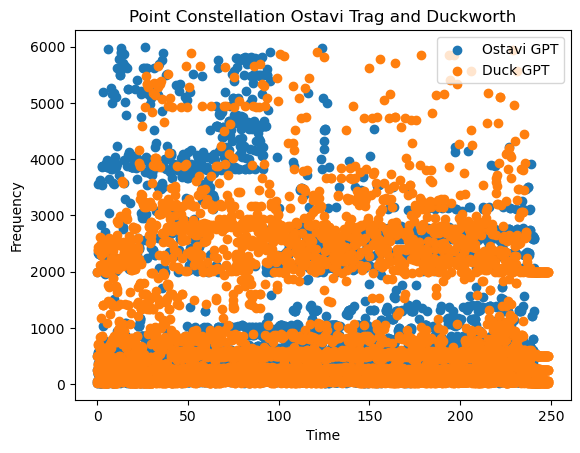

In [71]:
o_gpt = peak_finder("songs/Ostavi trag_September.mp3")

o_t_gpt = [o_gpt[t][0] for t in range(len(o_gpt))]
o_f_gpt = [o_gpt[t][1] for t in range(len(o_gpt))]

d_gpt = peak_finder("/Users/nicholaskim/Documents/Repositories/sample detector/songs/DUCKWORTH_Kendrick_Lamar.mp3")

d_t_gpt = [d_gpt[t][0] for t in range(len(d_gpt))]
d_f_gpt = [d_gpt[t][1] for t in range(len(d_gpt))]

plt.scatter(o_t_gpt,o_f_gpt,label="Ostavi GPT")
plt.scatter(d_t_gpt,d_f_gpt,label="Duck GPT")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Point Constellation Ostavi Trag and Duckworth")
plt.legend()

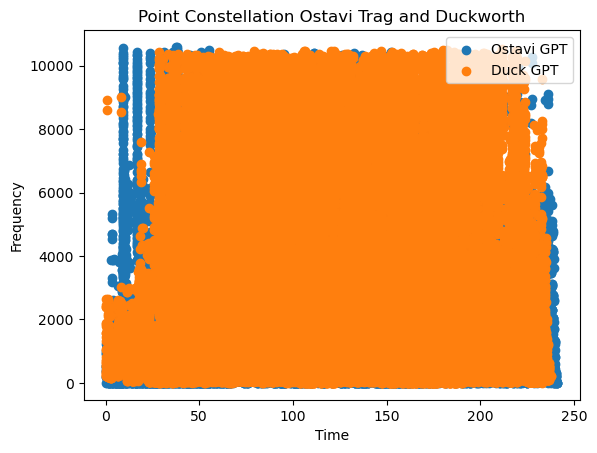

In [60]:
#plot of the point constellations to see if there is a similarity

o_times = []
o_freq = []

for i in range(len(ostavi_constellation)):
    o_times.append(ostavi_constellation[i][0])
    o_freq.append(ostavi_constellation[i][1])
    
d_times = []
d_freq = []

for i in range(len(duck_constellation)):
    d_times.append(duck_constellation[i][0])
    d_freq.append(duck_constellation[i][1])

plt.scatter(o_t_gpt,o_f_gpt,label="Ostavi GPT")
plt.scatter(d_t_gpt,d_f_gpt,label="Duck GPT")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Point Constellation Ostavi Trag and Duckworth")
plt.legend()


In [25]:
chunk_size = int(sr2*10)

len(y2) % int(len(y2)/chunk_size)

0

In [ ]:
chunk_size = int(sr2*10)

num_chunks = int(len(y2)/chunk_size)
remainder = len(y2) % num_chunks

bands= [[20,60],[60,250],[250,500],[500,2000],[2000,6000]]

for i in range(num_chunks):
    start_sample = i*chunk_size
    end_sample = (i+1)*chunk_size

    chunk = y2[start_sample:end_sample]    
    for j in range(len(bands)):
        start = bands[j][0]
        end = bands[j][1]
        
        frequencies = librosa.fft_frequencies(sr=sr2, n_fft=2048)
        band_mask = (frequencies >= start) & (frequencies < end)
        
    S = np.abs(librosa.stft(chunk, n_fft=2048, hop_length=512))
band_energy=S[band_mask,:]
np.max(band_energy, axis=1) 
peak_ind = np.argmax(band_energy, axis=1)
librosa.frames_to_time(peak_ind)

array([225.32643991])

In [52]:
start_sample = 0*chunk_size
end_sample = (0+1)*chunk_size

chunk = y2[start_sample:end_sample]  

frequencies = librosa.fft_frequencies(sr=sr2, n_fft=2048)
band_mask = (frequencies >= 0) & (frequencies < 60)
S = np.abs(librosa.stft(y2, n_fft=2048, hop_length=512))
S_db = librosa.amplitude_to_db(S, ref=np.max)

S_db[:,start_sample:end_sample]

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

In [46]:
chunk

array([-3.14809370e-08,  7.79047440e-08, -9.00361243e-08, ...,
       -1.00713540e-02, -1.17870066e-02, -1.19907595e-02], dtype=float32)

In [41]:
t = S[band_mask,:]
for i in range(len(t)):
    print(np.max(t[i]))

63.15465
166.31357
275.7292
425.0647
497.57938
526.1871


In [389]:
match = []
match_loc = []

for id in w_fingerprint:
    if id in u_fingerprint:
        f_a = w_fingerprint[id][1]
        f_tar = u_fingerprint[id][1]
        
        delta = f_tar - f_a 

        if np.abs(delta) < 2:
            t_a = w_fingerprint[id][0]
            t_tar = u_fingerprint[id][0]
            match_loc.append((id,t_a,t_tar))
            
            match.append(delta)
        

In [390]:
def match_finder(song_a, song_b,thres):
    #match = []
    match_loc = []
    
    for id in song_a:
        if id in song_b:
            f_a = song_a[id][1]
            f_tar = song_b[id][1]
            
            delta = f_tar - f_a 

            if np.abs(delta) < thres:
                t_a = song_a[id][0]
                t_tar = song_b[id][0]
                match_loc.append((id,t_a,t_tar))
                
                #match.append(delta)
    return match_loc

In [391]:
match_finder(w_fingerprint,o_fingerprint,2)

[('927fb47184b852a5fb3df047c40a27d2d0cdc01a',
  201.57242630385488,
  182.3695238095238),
 ('0305bd8b785d647dc735890e913a32e60d434745',
  102.00526077097506,
  140.17886621315193),
 ('73f4563dec5d6953549a0f440cbe056ea560a101',
  66.82702947845804,
  140.9683446712018),
 ('3d41934d3d08d579fc9afb835ad975400767ec26',
  85.07791383219954,
  137.25315192743764),
 ('fb94bd4f1bce9ffedd65c0a860318e927acc05ac',
  201.57242630385488,
  227.18403628117915),
 ('14c04c9a9c3a8a4356dbad8321c9e6f7e305bd30',
  64.7372335600907,
  96.13061224489796),
 ('4f2cbcfccde258a73e3c440044c71ea29a641c06',
  40.56526077097506,
  193.95628117913833),
 ('e02f92ba4e53d5f261a359b215ce5242bd13b318',
  40.56526077097506,
  193.95628117913833),
 ('1dbe42855978b6592879b25f276f9f12213d10eb',
  201.57242630385488,
  223.60816326530613),
 ('4e36bf885dfed5ffab88c8683196d566088d73f2', 152.6247619047619, 133.12),
 ('293fa8a4cc61e7cf13bcece4352ea91b4ef44122',
  152.6247619047619,
  179.55990929705214),
 ('e5ac26e133d28821951a1d4

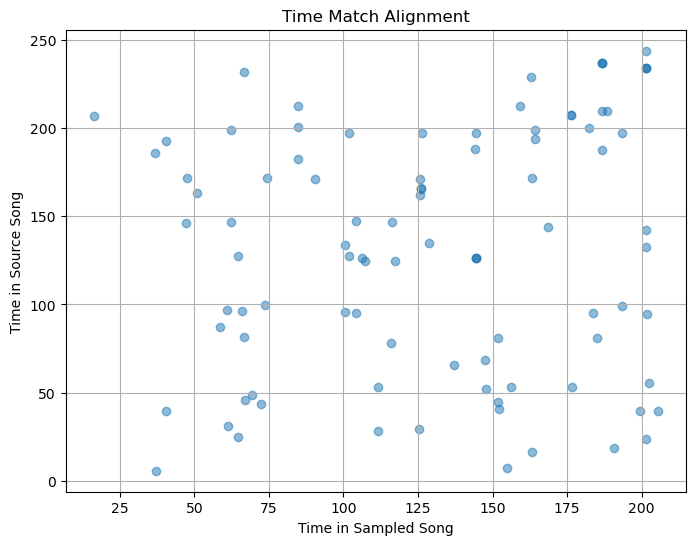

In [392]:
import matplotlib.pyplot as plt

t_a_list = [t_a for (_, t_a, f_tar) in match_loc]
t_tar_list = [t_tar for (_, f_a, t_tar) in match_loc]

plt.figure(figsize=(8,6))
plt.scatter(t_a_list, t_tar_list, alpha=0.5)
plt.xlabel("Time in Sampled Song")
plt.ylabel("Time in Source Song")
plt.title("Time Match Alignment")
plt.grid(True)
plt.show()


(array([ 10.,  14.,  38.,  57., 103.,  66.,  54.,  33.,  25.,  21.]),
 array([-197.83401361, -158.67356009, -119.51310658,  -80.35265306,
         -41.19219955,   -2.03174603,   37.12870748,   76.289161  ,
         115.44961451,  154.61006803,  193.77052154]),
 <BarContainer object of 10 artists>)

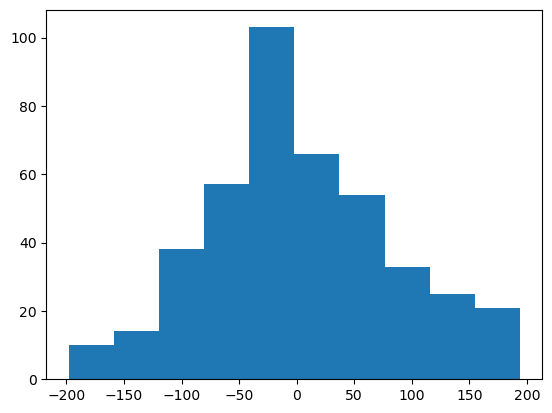

In [393]:
delta_ts = []

for id in w_fingerprint:
    if id in u_fingerprint:
        t_a = w_fingerprint[id][0]
        t_tar = u_fingerprint[id][0]
        
        delta_t = t_a - t_tar

        delta_ts.append(delta_t)

plt.hist(sorted(delta_ts))

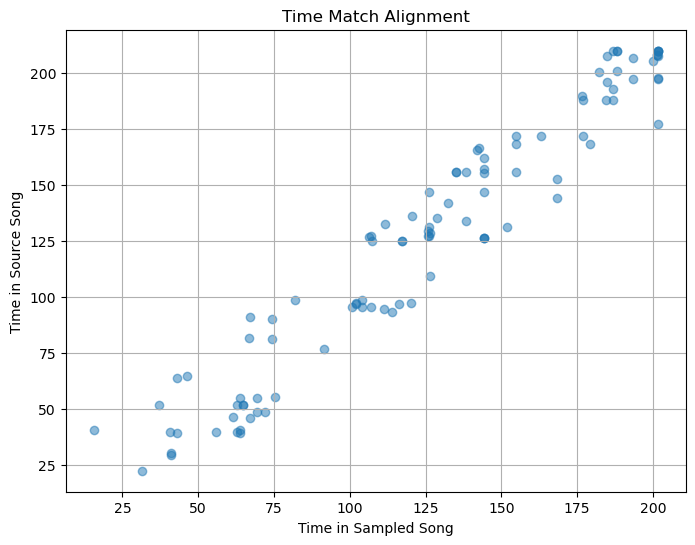

In [396]:
match_loc = []

for id in w_fingerprint:
    if id in u_fingerprint:
        t_a = w_fingerprint[id][0]
        t_tar = u_fingerprint[id][0]
        
        delta = t_tar - t_a 
        #match_loc.append((id,t_a,t_tar))
        
        if np.abs(delta) < 25:
            match_loc.append((id,t_a,t_tar))
        
        
        

t_a_list = [t_a for (_, t_a, t_tar) in match_loc]
t_tar_list = [t_tar for (_, t_a, t_tar) in match_loc]

plt.figure(figsize=(8,6))
plt.scatter(t_a_list, t_tar_list, alpha=0.5)
plt.xlabel("Time in Sampled Song")
plt.ylabel("Time in Source Song")
plt.title("Time Match Alignment")
plt.grid(True)
plt.show()

In [380]:
import pandas as pd

df = pd.DataFrame({"source":t_a_list,"sample":t_tar_list})
df.corr(method="pearson")

,source,sample
source,1.000000,0.609337
sample,0.609337,1.000000


(array([20., 32., 49., 52., 98., 68., 29., 19., 20.,  5.]),
 array([-186.68843537, -150.53496599, -114.3814966 ,  -78.22802721,
         -42.07455782,   -5.92108844,   30.23238095,   66.38585034,
         102.53931973,  138.69278912,  174.8462585 ]),
 <BarContainer object of 10 artists>)

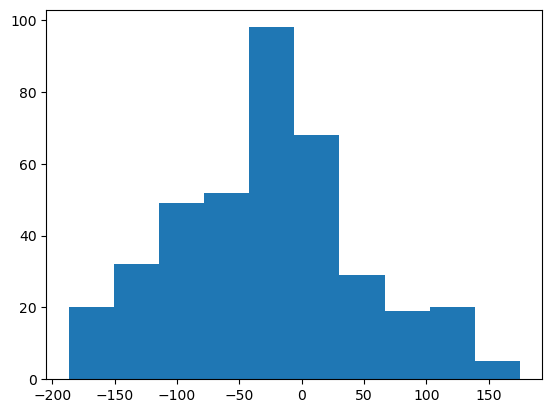

In [353]:
delta_ts = []

for id in w_fingerprint:
    if id in o_fingerprint:
        t_a = w_fingerprint[id][0]
        t_tar = o_fingerprint[id][0]
        
        delta_t = t_a - t_tar

        delta_ts.append(delta_t)

plt.hist(sorted(delta_ts))

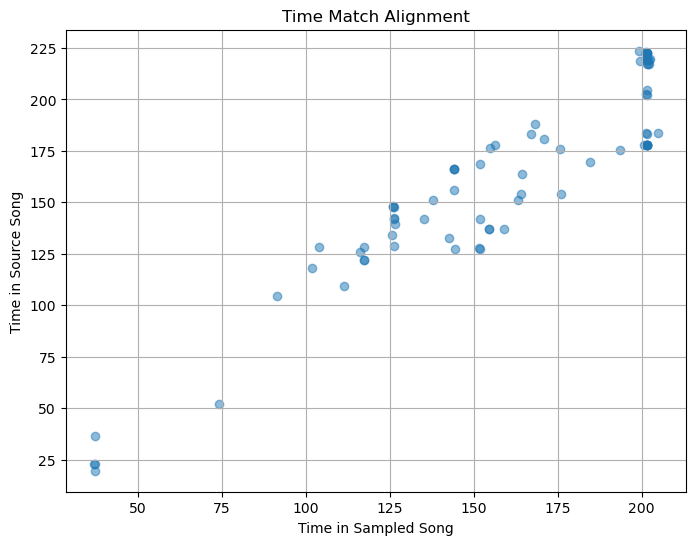

In [398]:
match_loc = []

for id in w_fingerprint:
    if id in d_fingerprint:
        t_a = w_fingerprint[id][0]
        t_tar = d_fingerprint[id][0]
        
        delta = t_tar - t_a 
        #match_loc.append((id,t_a,t_tar))
        
        if np.abs(delta) < 25:
            match_loc.append((id,t_a,t_tar))
          
        
        

t_a_list = [t_a for (_, t_a, t_tar) in match_loc]
t_tar_list = [t_tar for (_, t_a, t_tar) in match_loc]

plt.figure(figsize=(8,6))
plt.scatter(t_a_list, t_tar_list, alpha=0.5)
plt.xlabel("Time in Sampled Song")
plt.ylabel("Time in Source Song")
plt.title("Time Match Alignment")
plt.grid(True)
plt.show()

In [370]:
df = pd.DataFrame({"source":t_a_list,"sample":t_tar_list})
df.corr(method="pearson")

,source,sample
source,1.00000,0.45964
sample,0.45964,1.00000


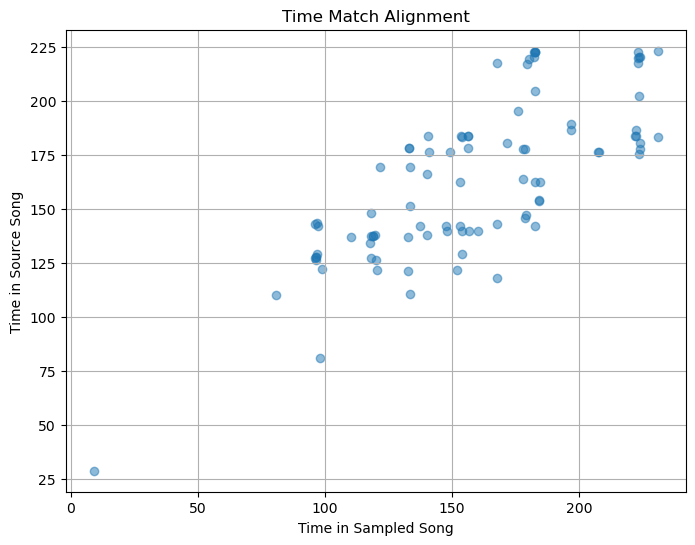

In [400]:
match_loc = []

for id in o_fingerprint:
    if id in d_fingerprint:
        t_a = o_fingerprint[id][0]
        t_tar = d_fingerprint[id][0]
        
        delta = t_tar - t_a 
        #match_loc.append((id,t_a,t_tar))
        
        if np.abs(delta) < 50:
            match_loc.append((id,t_a,t_tar))
        
        
        

t_a_list = [t_a for (_, t_a, t_tar) in match_loc]
t_tar_list = [t_tar for (_, t_a, t_tar) in match_loc]

plt.figure(figsize=(8,6))
plt.scatter(t_a_list, t_tar_list, alpha=0.5)
plt.xlabel("Time in Sampled Song")
plt.ylabel("Time in Source Song")
plt.title("Time Match Alignment")
plt.grid(True)
plt.show()

In [384]:
df = pd.DataFrame({"source":t_a_list,"sample":t_tar_list})
df.corr(method="pearson")

,source,sample
source,1.000000,0.452641
sample,0.452641,1.000000
